In [ ]:
'''Project 2 (Logistic Regression)
Problem Statement
Based on pima Indians hictorical diabetes data, build a machine learning binary classification model to predict the person is diabitic or not ?
Features :
Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age.
Label :
Outcome
'''

In [169]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [111]:
data = pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [112]:
data.shape

(768, 9)

In [113]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [114]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


It seems that, there is no mission value, But by looking at the describtion part there we can see some problem in our dataset. Lets see the Distribution of dataset

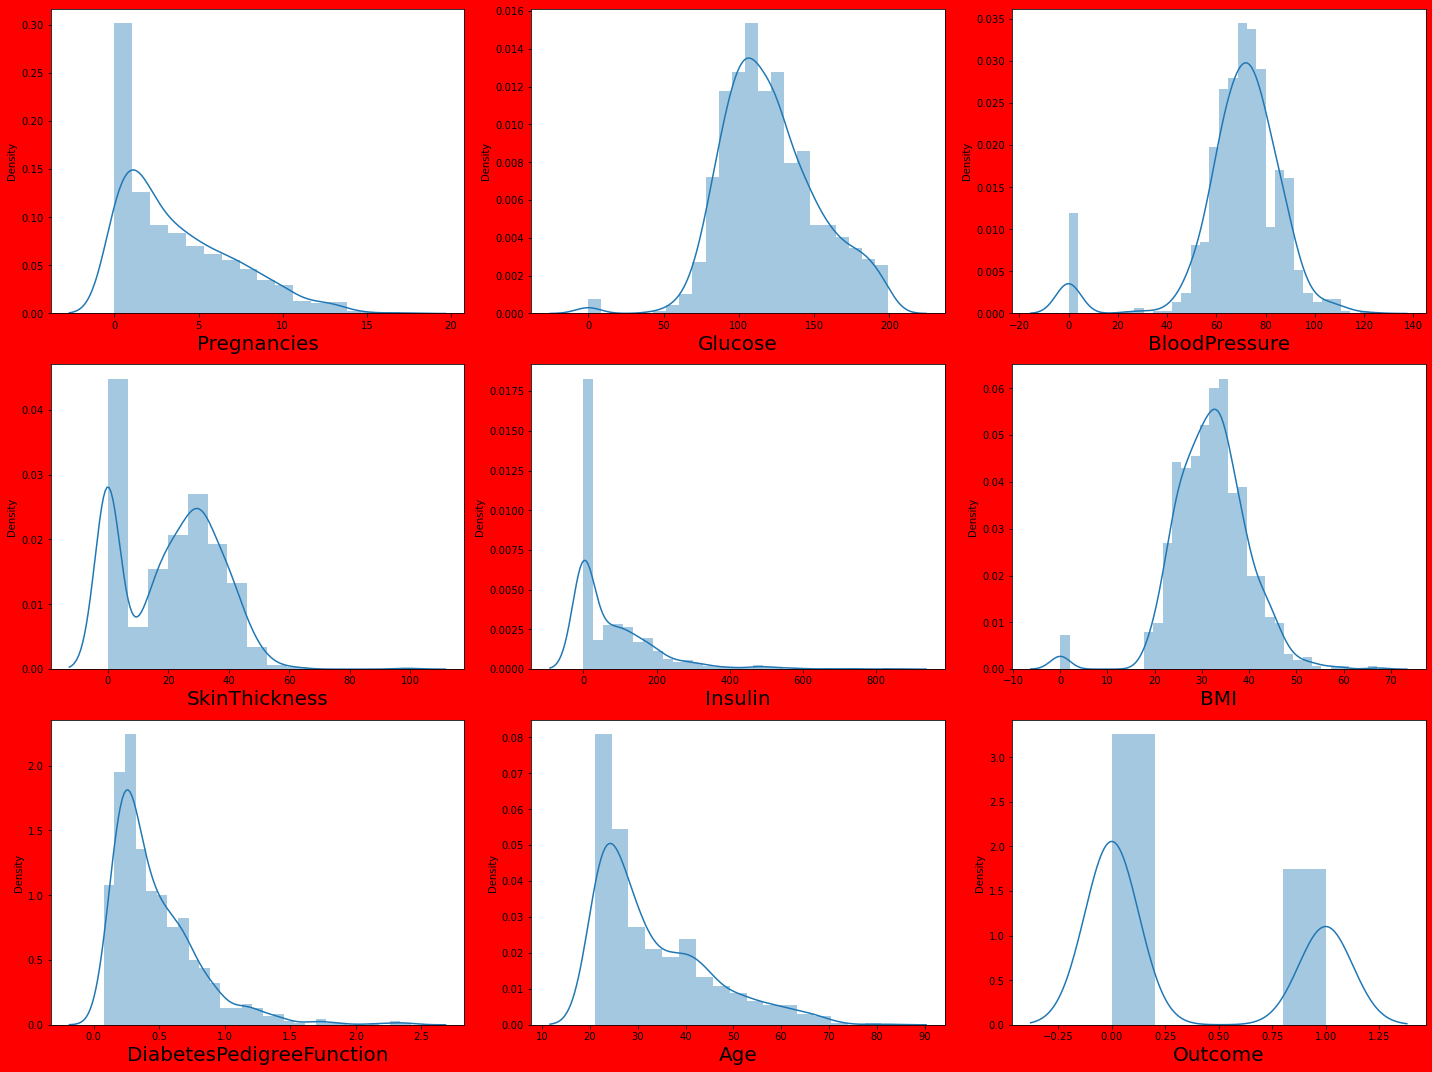

In [115]:
plt.figure(figsize = (20,15) ,facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
    
    plotnumber+=1
plt.tight_layout()

By, This distribution we can see that our dataset is having skewness present and also the 0 min which is not possible, so lets deal with those problem.

In [116]:
#replacing 0 with the mean value of column.
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())

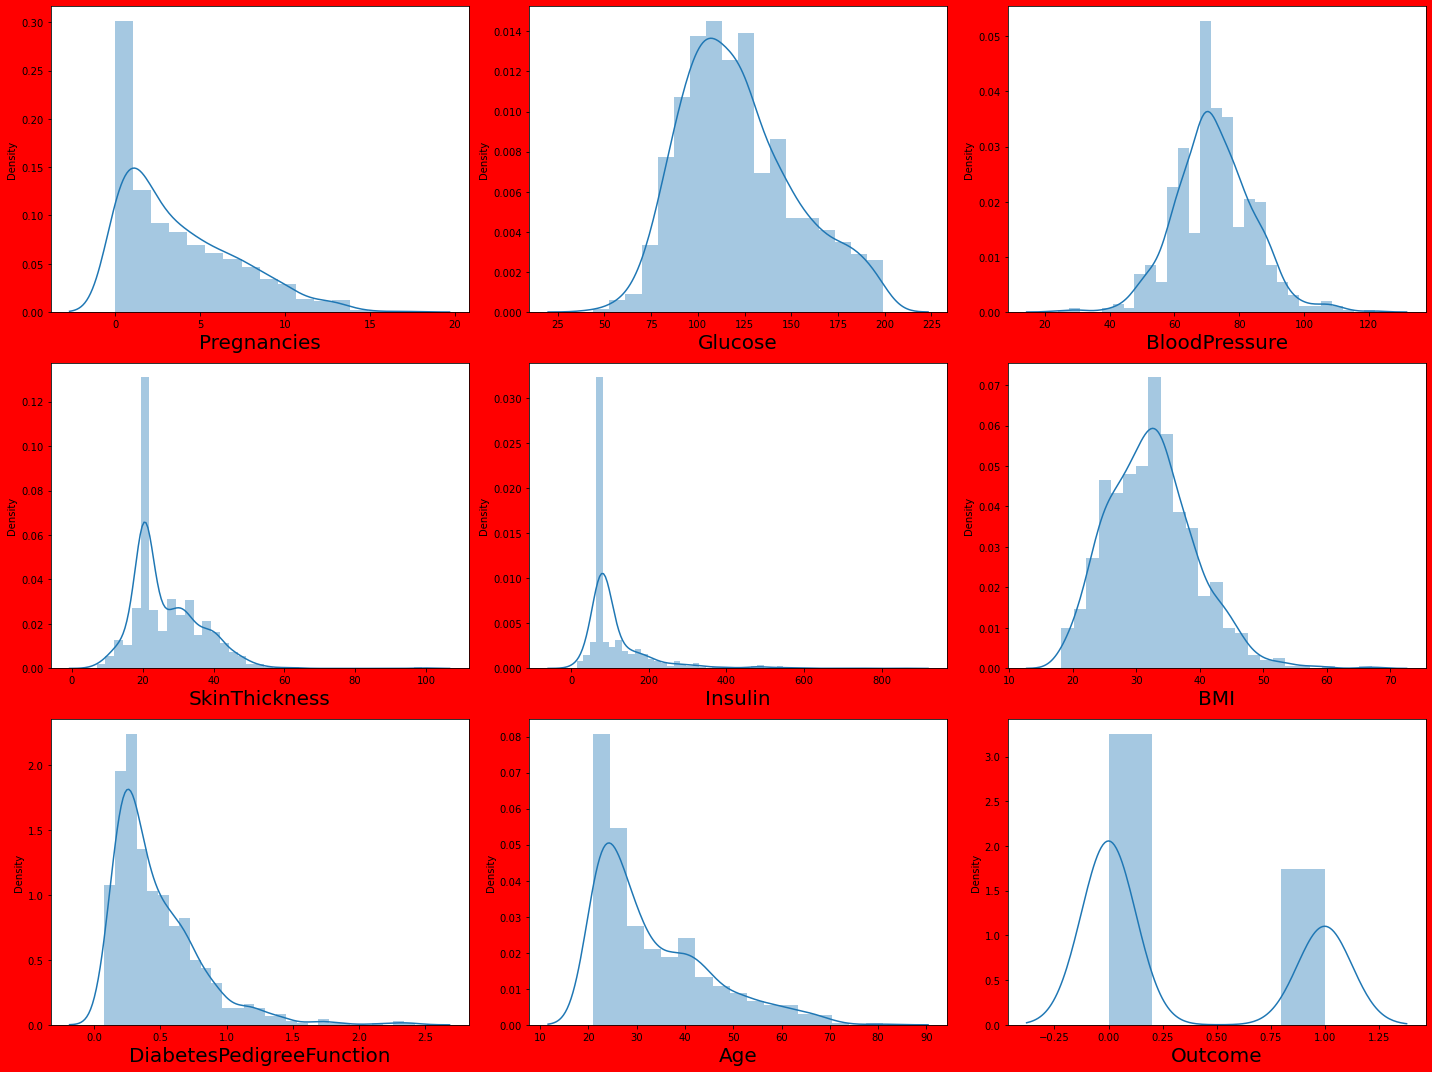

In [117]:
plt.figure(figsize = (20,15) ,facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
    
    plotnumber+=1
plt.tight_layout()

Here, We deal with the 0 value present in dataset, But still we are having skewness.

So, Now we have to deal with the skewness/outliers

In [118]:
df = data.drop('Outcome', axis = 1)
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47
767,1,93.0,70.0,31.000000,79.799479,30.4,0.315,23


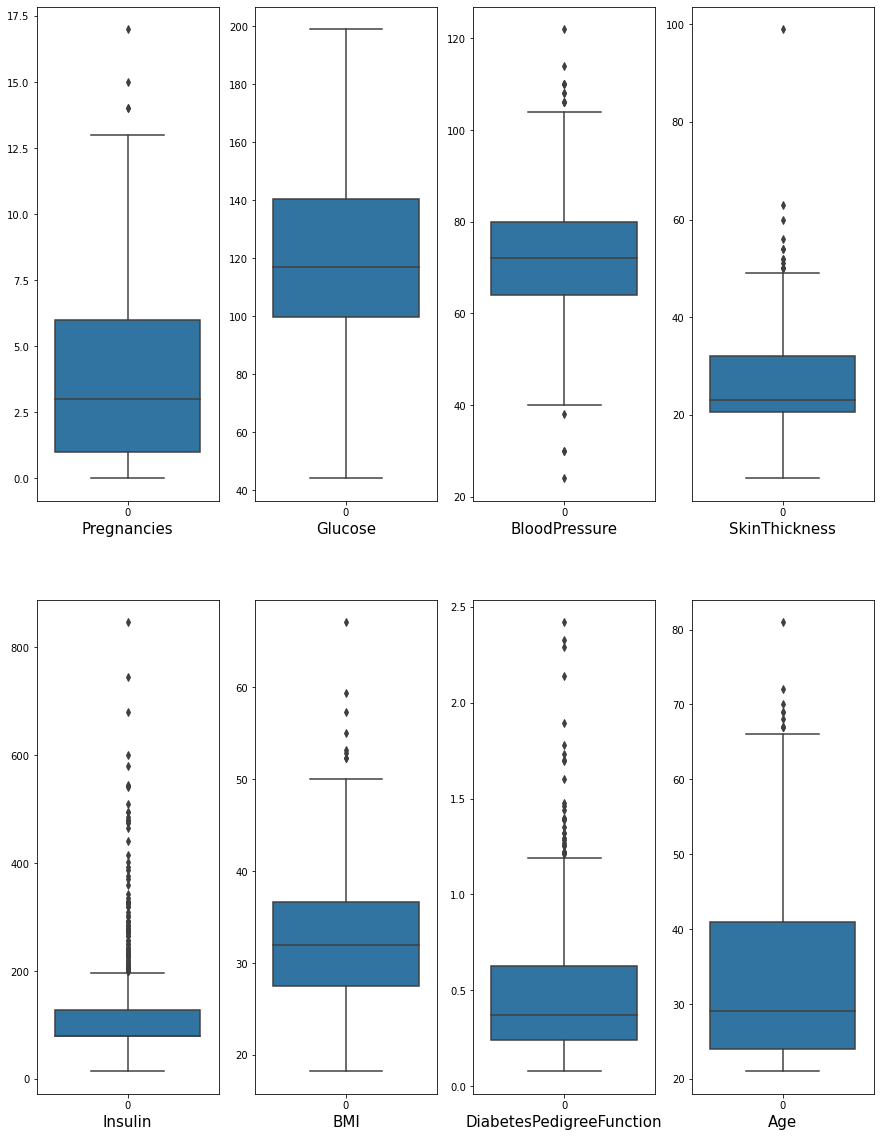

In [119]:
#Lets plot boxplot to see the outliers.
plt.figure(figsize = (15,20))
graph = 1
for column in df:
    if graph <= 8:
        plt.subplot(2,4,graph)
        ax = sns.boxplot(data = df[column])
        plt.xlabel(column, fontsize = 15)
    graph += 1
plt.show()

So, Here we can see that there are outliers present in our dataset. To remove the outliers we need to find the IQR and remove the higher side/lower side outliers.

In [120]:
data.shape

(768, 9)

In [121]:
#Q1 
q1 = data.quantile(0.25)
#Q3
q3 = data.quantile(0.75)
#IQR
iqr = q3-q1


Outliers Detection Formula:

- Higher Side = Q3 + (1.5 * IQR)

- Lower Side = Q1 - (1.5 * IQR)

In [122]:
preg_high = q3.Pregnancies + (1.5 * iqr.Pregnancies)
preg_high

13.5

- So, any data in Pregnancies column above 13.5 is an outlier....

In [123]:
index_preg = np.where(data['Pregnancies'] > preg_high)
index_preg

(array([ 88, 159, 298, 455]),)

- These are the index of the data which is an outlier(above 13.5)

In [124]:
data = data.drop(data.index[index_preg])
print(data.shape)

data.reset_index()

(764, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


- Here, we have drop the outliers of Pregnancies column and reset the index of the column.

Similarly, we will do with the other column

In [125]:
bp_high = q3.BloodPressure + (1.5 * iqr.BloodPressure)
print(bp_high)

index_bp = np.where(data['BloodPressure'] > bp_high)
print(index_bp)

data = data.drop(data.index[index_bp])
print(data.shape)

data.reset_index()

104.0
(array([ 43,  84, 105, 175, 359, 545, 654, 658, 668, 687]),)
(754, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [126]:
bp_low = q1.BloodPressure - (1.5 * iqr.BloodPressure)
print(bp_low)

index_bplow = np.where(data['BloodPressure'] < bp_low)
print(index_bplow)

data = data.drop(data.index[index_bplow])
print(data.shape)

data.reset_index()

40.0
(array([ 18, 121, 587, 589]),)
(750, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
745,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
746,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
747,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
748,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [127]:
skin_high = (q3.SkinThickness + (1.5 * iqr.SkinThickness))
print(skin_high)

index_skin = np.where(data['SkinThickness'] > skin_high)
print(index_skin)

data = data.drop(data.index[index_skin])
print(data.shape)

data.reset_index()

49.1953125
(array([ 55,  83,  95, 115, 144, 203, 265, 267, 435, 521, 567, 579]),)
(738, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
733,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
734,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
735,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
736,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [128]:
insu_high = (q3.Insulin + (1.5 * iqr.Insulin))
print(insu_high)

index_insu = np.where(data['Insulin'] > insu_high)
print(index_insu)

data = data.drop(data.index[index_insu])
print(data.shape)

data.reset_index()

198.42578125
(array([  8,  13,  16,  19,  30,  38,  51,  52,  54,  70,  89, 103, 122,
       129, 134, 142, 150, 173, 182, 186, 193, 201, 206, 214, 217, 233,
       234, 240, 244, 263, 270, 271, 280, 281, 292, 303, 318, 342, 343,
       346, 352, 357, 370, 374, 377, 391, 394, 397, 406, 407, 433, 438,
       460, 465, 466, 467, 491, 499, 517, 519, 524, 525, 533, 539, 552,
       561, 570, 580, 582, 586, 619, 629, 631, 644, 650, 656, 665, 670,
       677, 680, 683, 685, 691, 718, 723]),)
(653, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
648,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
649,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
650,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
651,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [129]:
bmi_high = (q3.BMI + (1.5 * iqr.BMI))
print(bmi_high)

index_bmi = np.where(data['BMI'] > bmi_high)
print(index_bmi)

data = data.drop(data.index[index_bmi])
print(data.shape)

data.reset_index()

50.25
(array([162, 252]),)
(651, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
646,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
647,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
648,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
649,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [130]:
dpf_high = (q3.DiabetesPedigreeFunction + (1.5 * iqr.DiabetesPedigreeFunction))
print(dpf_high)

index_dpf = np.where(data['DiabetesPedigreeFunction'] > dpf_high)
print(index_dpf)

data = data.drop(data.index[index_dpf])
print(data.shape)

data.reset_index()

1.2
(array([  4,  11,  37,  46,  82, 122, 156, 181, 203, 205, 215, 243, 255,
       275, 310, 321, 453, 501, 520, 523, 524, 557, 559]),)
(628, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
623,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
624,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
625,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
626,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [131]:
age_high = (q1.Age + (1.5 * iqr.Age))
print(age_high)

index_age = np.where(data['Age'] > age_high)
print(index_age)

data = data.drop(data.index[index_age])
print(data.shape)

data.reset_index()

49.5
(array([  0,   7,  10,  14,  17,  21,  23,  51,  73,  90,  97, 102, 111,
       117, 163, 165, 169, 175, 177, 188, 208, 218, 221, 226, 227, 233,
       235, 252, 274, 289, 290, 320, 365, 367, 369, 383, 385, 389, 395,
       401, 404, 415, 417, 421, 422, 439, 442, 446, 449, 453, 456, 475,
       480, 490, 498, 523, 536, 540, 546, 548, 555, 569, 580, 582, 596,
       610, 617, 619, 623]),)
(559, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
1,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
2,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
3,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
4,6,3,78.0,50.0,32.000000,88.000000,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...,...,...
554,762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33,0
555,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
556,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
557,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


Now, we have deal with the skewness, to confirm this we need to visualize our dataset again with the distribution code ..... 

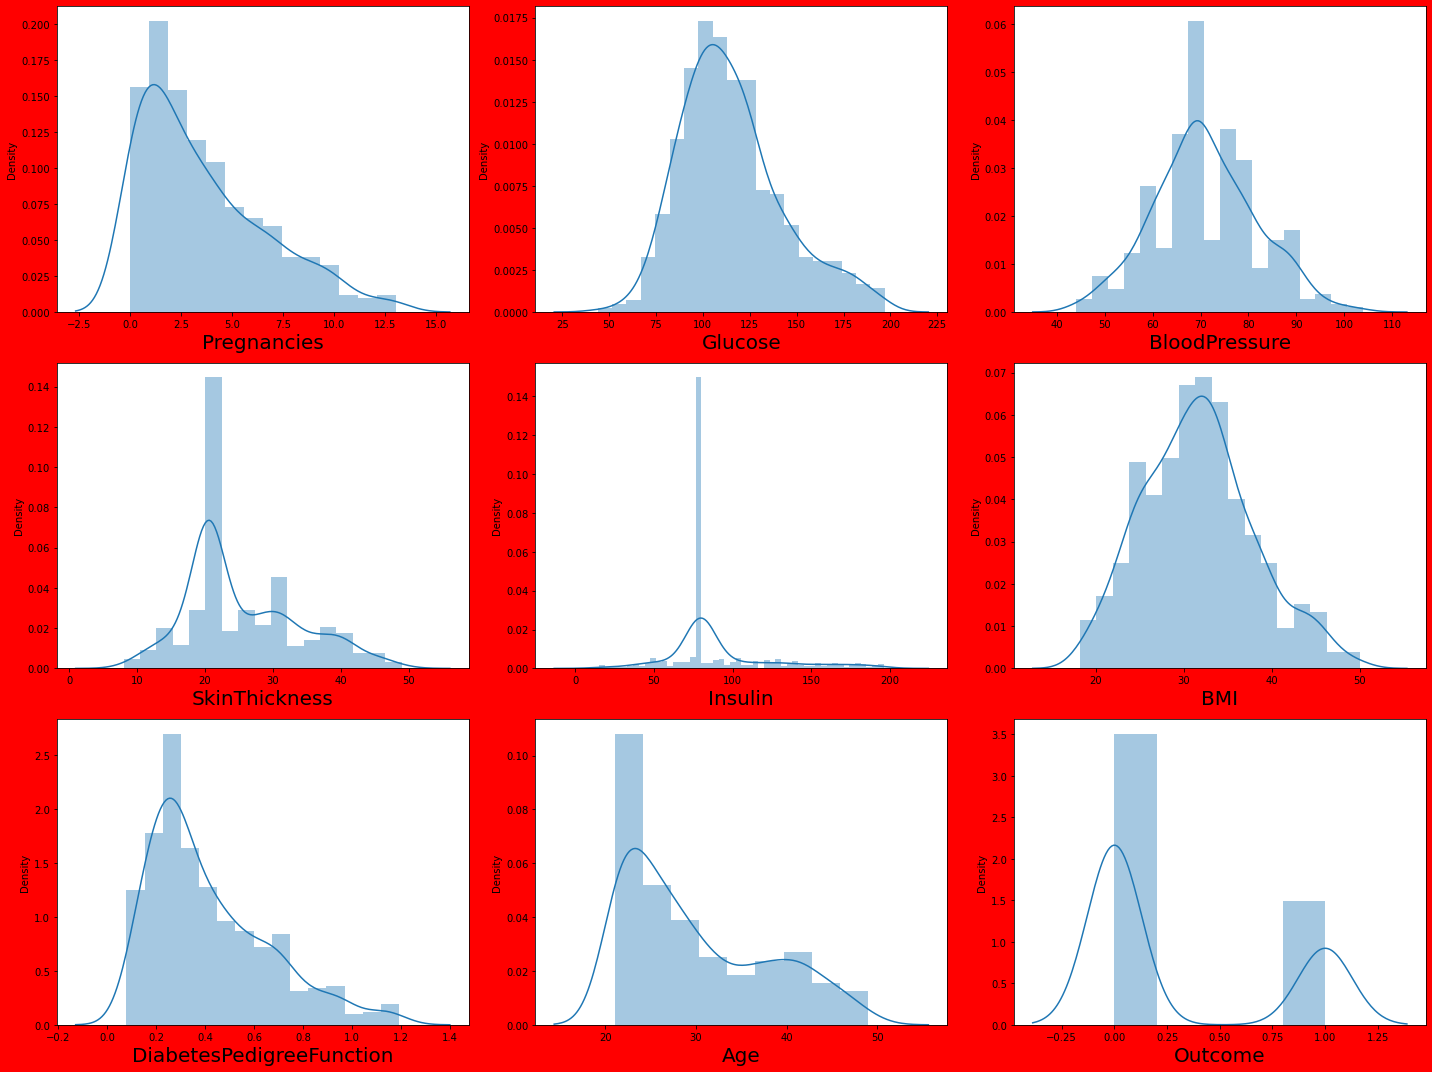

In [132]:
plt.figure(figsize = (20,15) ,facecolor = 'red')
plotnumber = 1

for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize = 20)
    
    plotnumber+=1
plt.tight_layout()

The data looks fine, and somewhere close to normal distribution, and also there is no skewness present now.

In [133]:
x_feature = data.drop('Outcome', axis = 1)
x_label = data.Outcome

In [134]:
x_label

1      0
2      1
3      0
5      0
6      1
      ..
762    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 559, dtype: int64

In [135]:
x_feature

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30
6,3,78.0,50.0,32.000000,88.000000,31.0,0.248,26
...,...,...,...,...,...,...,...,...
762,9,89.0,62.0,20.536458,79.799479,22.5,0.142,33
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


Now, lets visualize the relation between our Independent value(Features) and Categorical value(Label)

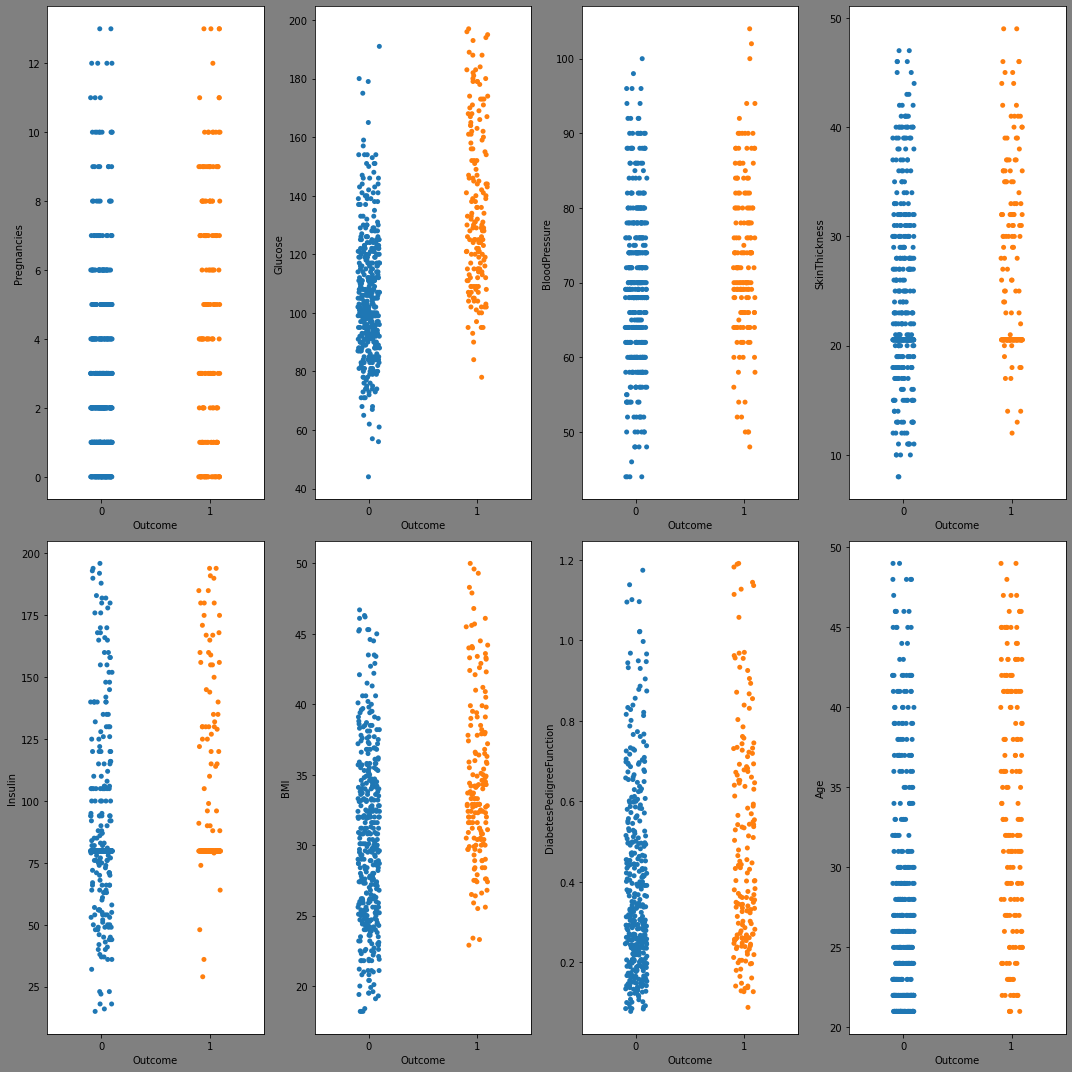

In [147]:
#lets visualize using stripplot
plt.figure(figsize = (15,15) ,facecolor = 'grey')
plotnumber = 1

for column in x_feature:
    if plotnumber <= 8:
        ax = plt.subplot(2,4,plotnumber)
        sns.stripplot(x_label,x_feature[column])
        
    
    plotnumber+=1
plt.tight_layout()

We can say that every column is important.

Now, Check the multicollinearity, but before we need to scale out data

In [153]:
#StandardScaler()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_feature)
x_scaled

array([[-0.81714646, -1.10433644, -0.45206836, ..., -0.80836514,
        -0.26938488,  0.13686478],
       [ 1.41418229,  2.46833646, -0.63784894, ..., -1.33125241,
         1.04329581,  0.26395351],
       [-0.81714646, -0.95851306, -0.45206836, ..., -0.5706891 ,
        -1.0218249 , -1.1340225 ],
       ...,
       [ 0.45789854,  0.20807401,  0.10527337, ..., -0.87174541,
        -0.70285576,  0.00977606],
       [-0.81714646,  0.39035324, -1.00941009, ..., -0.25378773,
        -0.27756358,  2.17028444],
       [-0.81714646, -0.81268967, -0.08050721, ..., -0.20625252,
        -0.41660141, -0.87984504]])

In [160]:
#checking the multicollinearity using VIF 
a = x_scaled.shape[1]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled, i) for i in range(a)]
vif['Features'] = x_feature.columns
vif

,VIF,Features
0,1.715695,Pregnancies
1,1.217895,Glucose
2,1.215093,BloodPressure
3,1.431374,SkinThickness
4,1.207165,Insulin
5,1.502482,BMI
6,1.036793,DiabetesPedigreeFunction
7,1.893841,Age


All the vif values are less then 5 & are low, this means that there is no multicollinearity present in our dataset.

Now, we can go ahead with fitting our data to the model

# - Training The Model

In [161]:
#train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled, x_label, test_size = 0.25, random_state = 99)

**-Model Instantiating & Trainning**

In [163]:
#Logistic Regression 
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

So , Now our model is trainned and ready for prediction...

**-Model's Prediction**

In [164]:
y_pred = log_reg.predict(x_test)
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0])

**-Accuracy Score**

In [166]:
acc = accuracy_score(y_test, y_pred)
acc

0.7642857142857142

This is the accuracy of our model i.e 76%

**-Confusion Matrix**

In [167]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[86,  9],
       [24, 21]])

**-Classification Report**

In [170]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        95
           1       0.70      0.47      0.56        45

    accuracy                           0.76       140
   macro avg       0.74      0.69      0.70       140
weighted avg       0.76      0.76      0.75       140



Here is the complete report of our model.

**-ROC Curve**

In [173]:
fpr,tpr,threshold = roc_curve(y_test,y_pred)
print('Threshold : ', threshold)
print('True Positive Rate: ', tpr)
print('False Positive Rate: ', fpr)

Threshold :  [2 1 0]
True Positive Rate:  [0.         0.46666667 1.        ]
False Positive Rate:  [0.         0.09473684 1.        ]


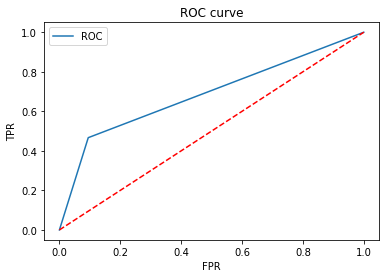

In [174]:
plt.plot(fpr, tpr, label = 'ROC')
plt.plot([0,1],[0,1], color = 'red', linestyle = '--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.legend()
plt.show()

**-ROC AUC Score**

In [175]:
#How much area it is covering.
auc_score = roc_auc_score(y_test,y_pred)
auc_score

0.6859649122807019

AUC score is the important matrics in our model that greater the AUC score, Better is our Model. 

** COMPLETED BUILDING THE LOGISTIC REGRESSION MODEL **